In [1]:
from neuralnet import *
from dataloader import *
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

c = load_config('config.yaml')
d = DataLoader() # data loader does everything for u


X = d.X_train
y = d.y_train


X_val = d.X_val
y_val = d.y_val

# # prepare small data
# ind=np.random.randint(low =0, high = d.X_train.shape[0], size = 500)
# X = d.X_train[ind, :]
# y = d.y_train[ind]
# ind=np.random.randint(low =0, high = 5000, size = 30)
# X_val = d.X_val[ind, :]
# y_val = d.y_val[ind]





In [2]:
c

{'layer_specs': [3072, 64, 64, 10],
 'activation': 'tanh',
 'learning_rate': 0.005,
 'batch_size': 128,
 'epochs': 100,
 'early_stop': True,
 'early_stop_epoch': 5,
 'L2_penalty': 0,
 'momentum': True,
 'momentum_gamma': 0.9}

In [2]:
test_dict = {} # to record test performance
val_dict = {}
train_dict = {}

epoch0, val=0.1278, train_acc=0.11315555555555555
epoch20, val=0.1724, train_acc=0.21913333333333335
epoch40, val=0.1928, train_acc=0.25737777777777776
epoch60, val=0.2178, train_acc=0.2849111111111111
epoch80, val=0.2328, train_acc=0.30395555555555553


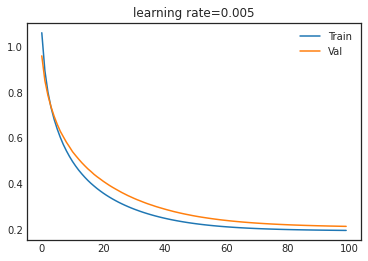

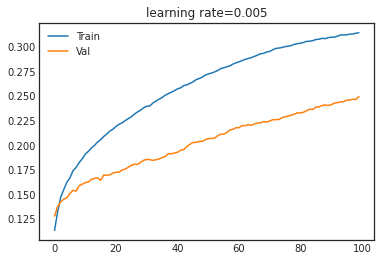

epoch0, val=0.1406, train_acc=0.11946666666666667
epoch20, val=0.2016, train_acc=0.25926666666666665
epoch40, val=0.2354, train_acc=0.3056888888888889
epoch60, val=0.2512, train_acc=0.32137777777777776
epoch80, val=0.254, train_acc=0.328


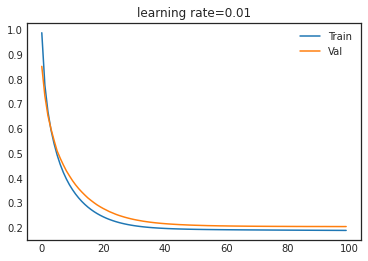

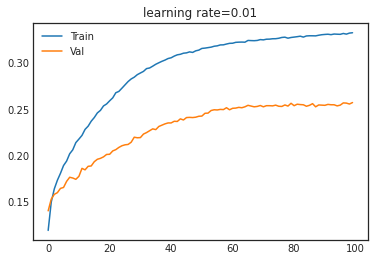

epoch0, val=0.172, train_acc=0.14926666666666666
epoch20, val=0.279, train_acc=0.3292
epoch40, val=0.2794, train_acc=0.3476444444444444
epoch60, val=0.2774, train_acc=0.3641333333333333
epoch80, val=0.2804, train_acc=0.3736


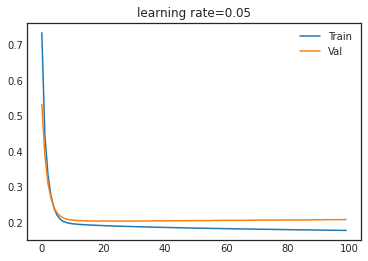

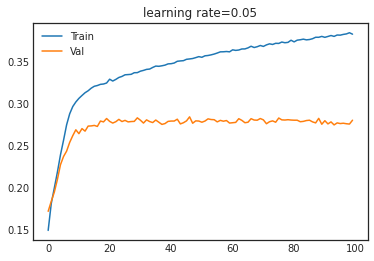

epoch0, val=0.2578, train_acc=0.21266666666666667
epoch20, val=0.3308, train_acc=0.35686666666666667
epoch40, val=0.332, train_acc=0.3926
epoch60, val=0.3526, train_acc=0.41135555555555553
epoch80, val=0.351, train_acc=0.43306666666666666


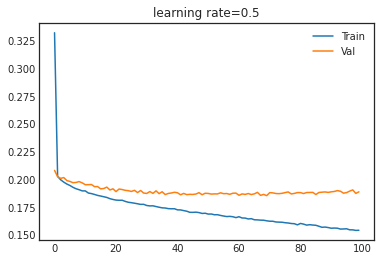

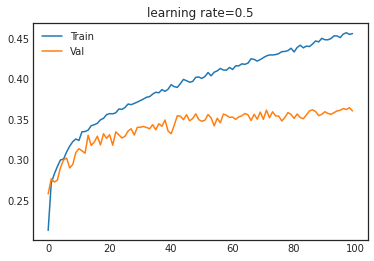

epoch0, val=0.2432, train_acc=0.22511111111111112
epoch20, val=0.3408, train_acc=0.3446888888888889
epoch40, val=0.3452, train_acc=0.37244444444444447
epoch60, val=0.3588, train_acc=0.3893333333333333
epoch80, val=0.3848, train_acc=0.4070666666666667


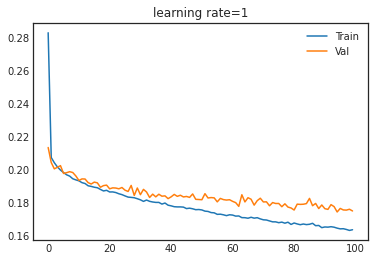

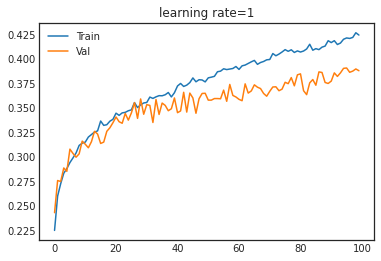

epoch0, val=0.2054, train_acc=0.16284444444444446
epoch20, val=0.1844, train_acc=0.18688888888888888
epoch40, val=0.1762, train_acc=0.18557777777777779
epoch60, val=0.1636, train_acc=0.18697777777777777
epoch80, val=0.17, train_acc=0.18913333333333332


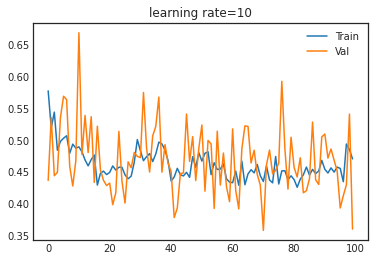

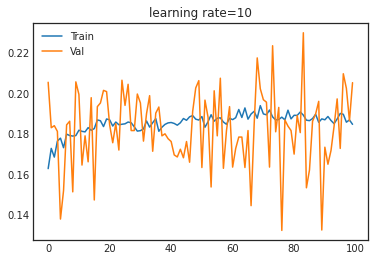

In [3]:
import pandas as pd
for lr in [0.005,0.01,0.05,0.5, 1,10]:

    new_config = c.copy()
    new_config['learning_rate'] = lr
    new_config['momentum'] = True
    new_config['momentum_gamma'] = 0.9
    new_config['L2_penality'] = 0
    new_config['epochs'] = 100
    nn =  Neuralnetwork(new_config)

    tloss, vloss, tacc, vacc = train(nn, X, y, X_val,y_val,c)
    
    # save performance
    performance = pd.DataFrame([tloss, vloss, tacc, vacc], index = ['train_loss', 'val_loss', 'train_acc', 'vacc']).T
    performance.to_csv(f'Acc_curve_Lr_{lr}.csv')
    
    # plot loss curve
    plt.plot(np.array(tloss), label = 'Train')
    plt.plot(np.array(vloss), label = 'Val')
    plt.legend()
    plt.title(f'learning rate={lr}')
    plt.savefig(f'Loss_curve_Learnrate_{lr}.png')
    plt.show()
    
    # plot acc curve
    plt.plot(np.array(tacc), label = 'Train')
    plt.plot(np.array(vacc), label = 'Val')
    plt.legend()
    plt.title(f'learning rate={lr}')
    plt.savefig(f'Acc_curve_Learnrate_{lr}.png')
    plt.show()
    
    test_dict[lr]=test(nn, d.X_test, d.y_test)
    val_dict[lr]=vacc[-1]
    train_dict[lr]=tacc[-1]

In [4]:
test_performance = pd.DataFrame.from_dict(test_dict, orient = 'index')
test_performance.reset_index(inplace = True)
test_performance.columns = ['learning rate','Test accuracy']
test_performance

,learning rate,Test accuracy
0,0.005,0.2555
1,0.010,0.2725
2,0.050,0.2820
3,0.500,0.3651
4,1.000,0.3962
5,10.000,0.2001


In [5]:
val_performance = pd.DataFrame.from_dict(val_dict, orient = 'index')
val_performance.reset_index(inplace = True)
val_performance.columns = ['learning rate','Val accuracy']
val_performance

,learning rate,Val accuracy
0,0.005,0.2496
1,0.010,0.2574
2,0.050,0.2804
3,0.500,0.3602
4,1.000,0.3880
5,10.000,0.2052


In [6]:
train_performance = pd.DataFrame.from_dict(train_dict, orient = 'index')
train_performance.reset_index(inplace = True)
train_performance.columns = ['learning rate','Test accuracy']
train_performance

,learning rate,Test accuracy
0,0.005,0.314578
1,0.010,0.332689
2,0.050,0.382756
3,0.500,0.455733
4,1.000,0.424378
5,10.000,0.184667


In [7]:
perf = pd.DataFrame([test_dict, train_dict, val_dict]).T
perf.reset_index(inplace=True)
perf.columns = ['learning_rate', 'test accuracy', 'train accuracy', 'val accuracy']

In [8]:
print(perf.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  learning\_rate &  test accuracy &  train accuracy &  val accuracy \\
\midrule
0 &          0.005 &         0.2555 &        0.314578 &        0.2496 \\
1 &          0.010 &         0.2725 &        0.332689 &        0.2574 \\
2 &          0.050 &         0.2820 &        0.382756 &        0.2804 \\
3 &          0.500 &         0.3651 &        0.455733 &        0.3602 \\
4 &          1.000 &         0.3962 &        0.424378 &        0.3880 \\
5 &         10.000 &         0.2001 &        0.184667 &        0.2052 \\
\bottomrule
\end{tabular}



In [12]:
perf

,learning_rate,test accuracy,train accuracy,val accuracy
0,0.005,0.2555,0.314578,0.2496
1,0.010,0.2725,0.332689,0.2574
2,0.050,0.2820,0.382756,0.2804
3,0.500,0.3651,0.455733,0.3602
4,1.000,0.3962,0.424378,0.3880
5,10.000,0.2001,0.184667,0.2052


In [9]:
performance

,train_loss,val_loss,train_acc,vacc
0,0.577415,0.436757,0.162844,0.2054
1,0.519412,0.535418,0.172822,0.1830
2,0.544067,0.444205,0.168533,0.1840
3,0.484195,0.449264,0.176444,0.1812
4,0.498203,0.535895,0.177867,0.1380
...,...,...,...,...
95,0.455660,0.393480,0.190022,0.1728
96,0.434816,0.412831,0.189622,0.2096
97,0.493957,0.429895,0.185733,0.2024
98,0.485247,0.540912,0.186844,0.1864


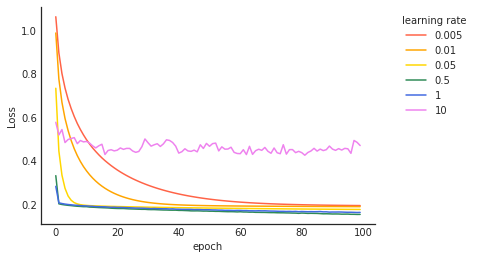

In [20]:
# plot in same
import seaborn as sns
f,ax = plt.subplots()
lrs = [0.005,0.01,0.05,0.5, 1,10]
colors = ['tomato', 'orange', 'gold', 'seagreen', 'royalblue', 'violet']
for lr, c in zip(lrs, colors):
    performance=pd.read_csv(f'Acc_curve_Lr_{lr}.csv')
    
    performance['train_loss'].plot(label = f'{lr}', ax = ax, c = c)
    #performance['val_loss'].plot(label = f'{lr}_val', ax = ax, c = c, marker = '+')
plt.legend(title='learning rate',bbox_to_anchor=(1.3,1))
plt.xlabel('epoch')
plt.ylabel('Loss')

sns.despine()

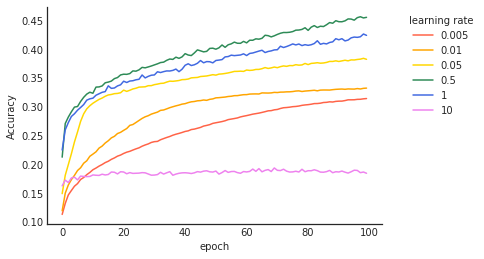

In [19]:
# plot in same
import seaborn as sns
f,ax = plt.subplots()
lrs = [0.005,0.01,0.05,0.5, 1,10]
colors = ['tomato', 'orange', 'gold', 'seagreen', 'royalblue', 'violet']
for lr, c in zip(lrs, colors):
    performance=pd.read_csv(f'Acc_curve_Lr_{lr}.csv')
    
    performance['train_acc'].plot(label = f'{lr}', ax = ax, c = c)
    #performance['vacc'].plot(label = f'{lr}_val', ax = ax, c = c, marker = '+')
plt.legend(title='learning rate',bbox_to_anchor=(1.3,1))
plt.xlabel('epoch')
plt.ylabel('Accuracy')

sns.despine()

'violet'